# High Granularity Calorimeter (HGCAL) test beam analysis


My aim in this work is to see whether we can distinguish the particles just by looking at their electromagnetic shower propagations in the calorimeter by making use of machine learning models. I first trained 3 models (Decision Tree, Random Forest, Linear Regression) using B2Metric's Auto-ML platform which serves an easier way to get results from different models and comparing them to choose the best performing model. Decision tree has given the best log-loss score. In this notebook I will again train Decision Tree for demonstrating purposes.

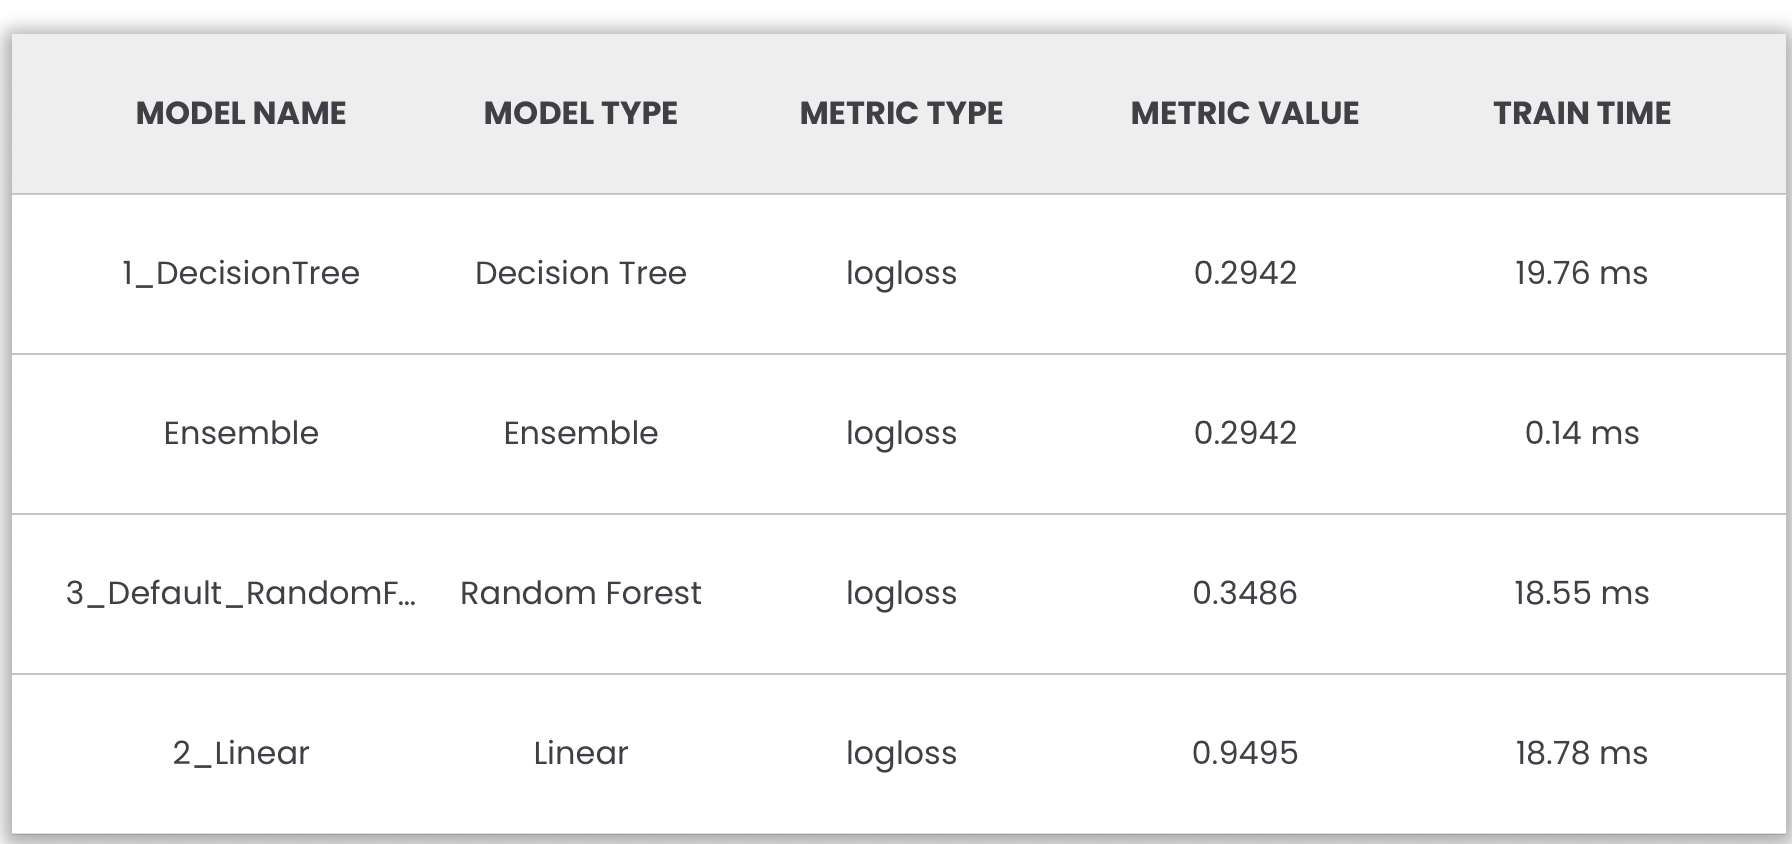

In [143]:
Image(filename='model_results.png')

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from IPython.display import Image

Our dataset consists of the data that were collected during October 2018 at the H2 beam line at CERN. I only included the energies per layer and the beam energies to see if we can distinguish just by looking at how much energy the particles leave at each layer of the calorimeters, represented as in the following prototypes: 

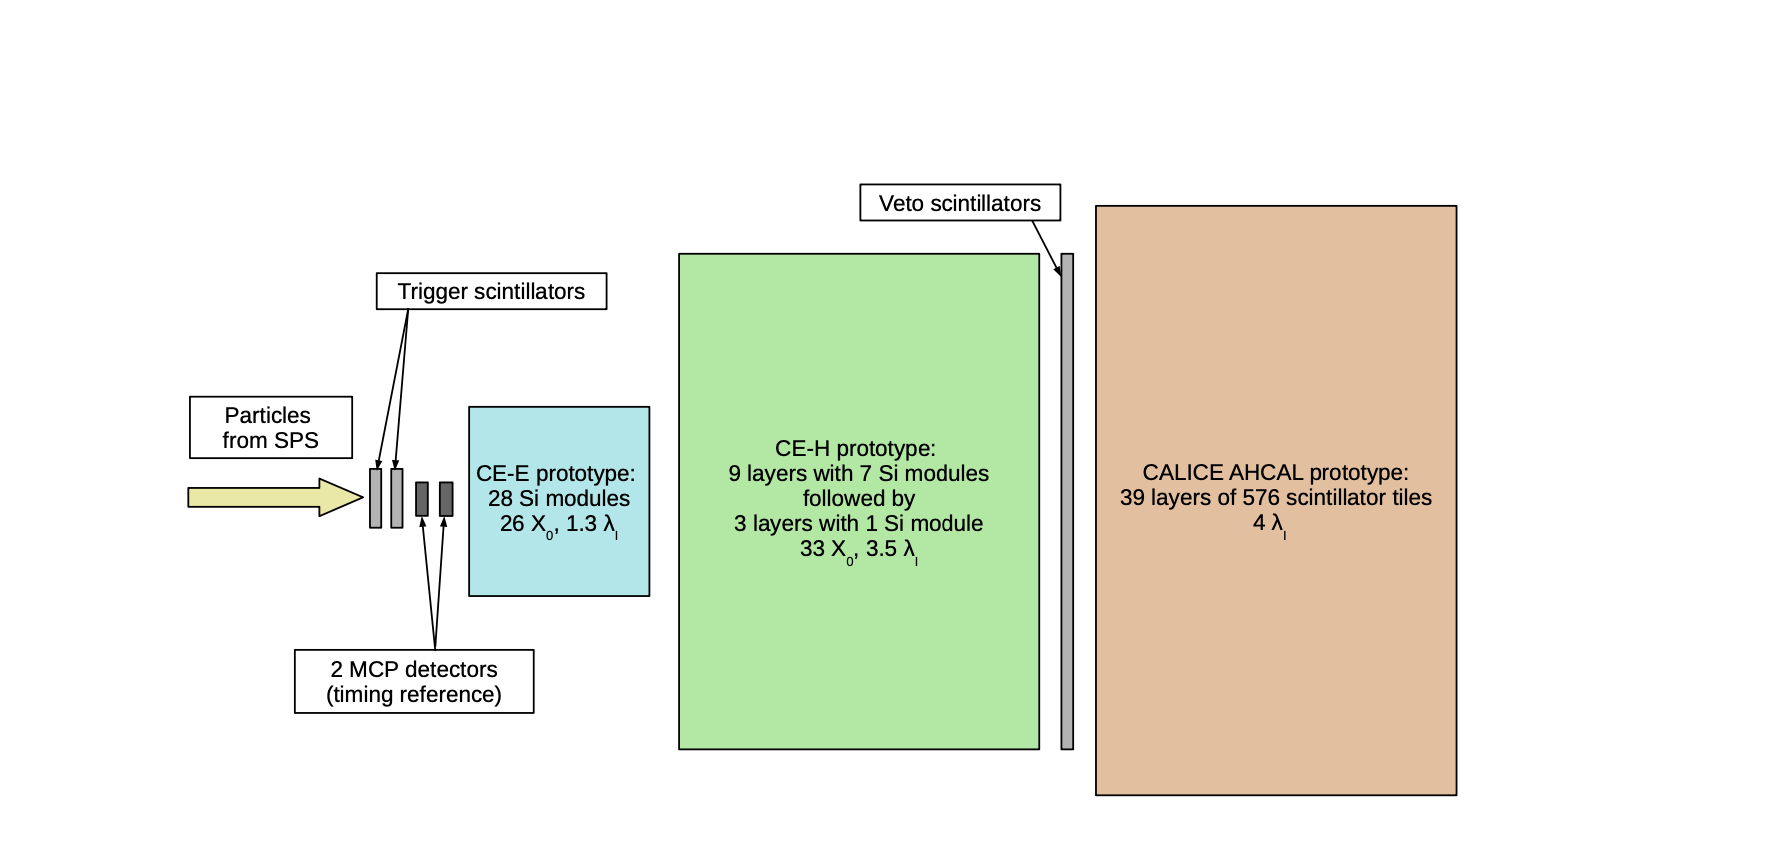

In [194]:
Image(filename="beam_test_setup.png")

In [8]:
df = pd.read_csv("perlayer_merged.csv")

In [74]:
df

,Layer,Energy,BeamEnergy,Particle
0,1,77.66750,300,ele
1,2,259.46000,300,ele
2,3,792.90200,300,ele
3,4,1239.53000,300,ele
4,5,1980.10000,300,ele
...,...,...,...,...
190,35,8.96521,20,pion
191,36,3.33454,20,pion
192,37,4.52504,20,pion
193,38,1.08577,20,pion


In [33]:
ele_df = df[df["Particle"] == "ele"]
pion_df = df[df["Particle"] == "pion"]
muon_df = df[df["Particle"] == "muon"]

In [65]:
def plt_energy_per_layer(df):
    plt.bar(df["Layer"], df["Energy"])
    plt.xlabel("Layers")
    plt.ylabel("Energy")
    plt.title("Energy per Layer (MIP)")
    plt.show()

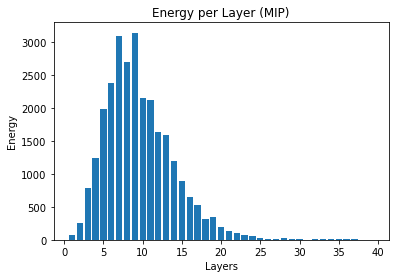

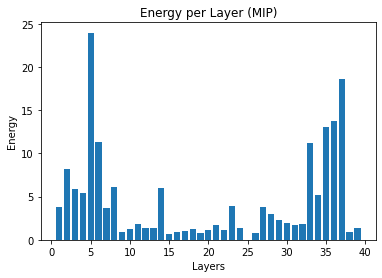

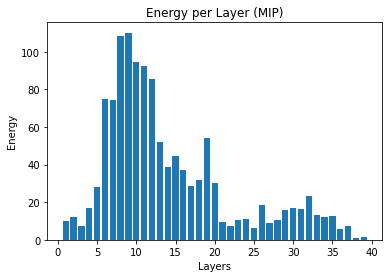

(None, None, None)

In [71]:
plt_energy_per_layer(ele_df), plt_energy_per_layer(muon_df), plt_energy_per_layer(pion_df)

As seen here, energy propagation in each layer varies for different particles. (muon, electron and pion in this case.) Now let us find out if a pattern emerges using Decision Tree algorithm.


### Predictions with Decision Tree

In [191]:
def split_dataset(df):
    
    # Separating the target variable
    X = df.drop("Particle", inplace=False, axis=1)
    Y = df.drop(["Layer", "Energy", "BeamEnergy"], inplace=False, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                        test_size = 0.3, 
                                                        random_state = 100, 
                                                        shuffle = True)
    y_test.to_csv("Test data.csv")
    return X, Y, X_train, X_test, y_train, y_test

In [99]:
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
                                      random_state = 100,
                                      max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [115]:
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy",
                                         random_state = 100,
                                         max_depth = 3,
                                         min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [189]:
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    indices = list(X_test.index)
    data = {"Index": indices, "Prediction": y_pred}
    y_pred_df = pd.DataFrame(data = data)
    print(y_pred_df)
    y_pred_df.to_csv("Predictions.csv", index=False)
    return y_pred

In [179]:
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [199]:
def main():
      
    # Building Phase
    data = df
    X, Y, X_train, X_test, y_train, y_test = split_dataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    print("Actual results:")
    print(y_test)
    # Operational Phase
    print()
    print("Predictions Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    
    cal_accuracy(y_test, y_pred_gini)
    print()
    print("Predictions Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      

In [200]:
if __name__=="__main__":
    main()
    

Actual results:
    Particle
164     pion
188     pion
146     pion
126     pion
151     pion
92      muon
153     pion
177     pion
116     muon
31       ele
64       ele
115     muon
168     pion
158     pion
162     pion
149     pion
191     pion
133     pion
11       ele
165     pion
15       ele
190     pion
172     pion
124     pion
82      muon
99      muon
89      muon
90      muon
125     pion
150     pion
189     pion
59       ele
41       ele
73       ele
32       ele
46       ele
157     pion
81      muon
96      muon
119     pion
154     pion
88      muon
7        ele
104     muon
69       ele
28       ele
29       ele
83      muon
40       ele
148     pion
111     muon
163     pion
75       ele
1        ele
74       ele
131     pion
65       ele
156     pion
122     pion

Predictions Using Gini Index:
    Index Prediction
0     164       pion
1     188       pion
2     146       pion
3     126       pion
4     151       pion
5      92       muon
6     153       pion
7    